In [1]:
import numpy as np

def gaussian_3d_torus_a(arc_len, par1, dla):
    par2 = dla
    a_par = par1 * (arc_len - par2)**2
    a_par_sign1 = (np.sign(dla - arc_len) + 1) / 2
    a_par_sign2 = (np.sign(a_par) + 1) / 2
    a_par_sign3 = (np.sign(arc_len) + 1) / 2
    a = a_par_sign1 * a_par_sign2 * a_par_sign3 * a_par
    return a

def gaussian_3d_torus_arclen(x, y, xv, yv, delta, xc, yc, R):
    mag_u = np.abs(np.sqrt((xv - xc)**2 + (yv - yc)**2))
    mag_v = np.abs(np.sqrt((x - xc)**2 + (y - yc)**2))
    dot_pro = (xv - xc) * (x - xc) + (yv - yc) * (y - yc)
    costheta = dot_pro / (mag_u * mag_v)
    theta_abs = np.abs(np.arccos(costheta))  # will always be +ve
    sign_theta = np.sign((xv - xc) * (y - yc) - (x - xc) * (yv - yc))
    theta_pos_neg = np.sign(delta) * sign_theta * theta_abs
    theta = np.remainder(2 * np.pi + theta_pos_neg, 2 * np.pi)
    arc_len = R * theta
    return arc_len

def gaussian_3d_torus_delta(delta_a):

    if abs(delta_a) < 1e-8:
        delta = 1e-8
    else:
        delta = delta_a
    return delta

def gaussian_3d_torus_dla(tla, V):
    dla = tla * V
    if dla < 1:
        dla = 1
    return dla

def gaussian_3d_torus_meshgrid(xv, yv, dla, res):
    n = 2
    xbl = xv - n * dla
    xbu = xv + n * dla
    ybl = yv - n * dla
    ybu = yv + n * dla
    x = np.arange(xbl, xbu + res, res)
    y = np.arange(ybl, ybu + res, res)
    X, Y = np.meshgrid(x, y)
    return X, Y, xbl, xbu, ybl, ybu

def gaussian_3d_torus_mexp(kexp, mcexp, delta):
    mexp = mcexp + kexp * abs(delta)
    return mexp

def gaussian_3d_torus_phiv(phiv_a):
    pi2temp = np.ceil(abs(phiv_a / (2 * np.pi)))  # how many rotations (for e.g. 6*pi/2*pi = 3)
    phiv = abs(np.remainder(2 * np.pi * pi2temp + phiv_a, 2 * np.pi))  # phiv interms of 0->2*pi radians
    return phiv

def gaussian_3d_torus_R(L, delta):
    R = np.abs(L / np.tan(delta))
    return R

def gaussian_3d_torus_sigma(arc_len, prb1, prb2):
    sigma = prb1 * arc_len + prb2
    return sigma

def gaussian_3d_torus_xcyc(xv, yv, phiv, delta, R):
    if delta > 0:
        phil = phiv + np.pi/2
    else:
        phil = phiv - np.pi/2
    xc = R * np.cos(phil) + xv
    yc = R * np.sin(phil) + yv
    return xc, yc

def gaussian_3d_torus_z(x, y, xc, yc, R, a, sigma1, sigma2):

    dist_R = np.sqrt((x - xc)**2 + (y - yc)**2)
    a_inside = (1 - np.sign(dist_R - R)) / 2
    a_outside = (1 + np.sign(dist_R - R)) / 2
    num = -(np.sqrt((x - xc)**2 + (y - yc)**2) - R)**2
    den1 = 2 * sigma1**2
    zpure1 = a * a_inside * np.exp(num / den1)
    den2 = 2 * sigma2**2
    zpure2 = a * a_outside * np.exp(num / den2)
    zpure = zpure1 + zpure2
    return zpure

def get_x_y_z(v, xv, yv, tla, par1, kexp1, kexp2, mcexp, cexp, Sr, res, L, ii):
    delta_fut_h = (np.pi / 180) * ii / Sr
    phiv_a = (np.pi / 180) * 0
    delta = gaussian_3d_torus_delta(delta_fut_h)
    phiv = gaussian_3d_torus_phiv(phiv_a)
    dla = gaussian_3d_torus_dla(tla, v)
    R = gaussian_3d_torus_R(L, delta)
    xc, yc = gaussian_3d_torus_xcyc(xv, yv, phiv, delta, R)
    X, Y, xbl, xbu, ybl, ybu = gaussian_3d_torus_meshgrid(xv, yv, dla, res)
    mexp1 = gaussian_3d_torus_mexp(kexp1, mcexp, delta)
    mexp2 = gaussian_3d_torus_mexp(kexp2, mcexp, delta)
    arc_len = gaussian_3d_torus_arclen(X, Y, xv, yv, delta, xc, yc, R)
    a = gaussian_3d_torus_a(arc_len, par1, dla)
    sigma1 = gaussian_3d_torus_sigma(arc_len, mexp1, cexp)
    sigma2 = gaussian_3d_torus_sigma(arc_len, mexp2, cexp)
    Z_cur = gaussian_3d_torus_z(X, Y, xc, yc, R, a, sigma1, sigma2)
    return X,Y,Z_cur

(2001, 2001) (2001, 2001) (2001, 2001)


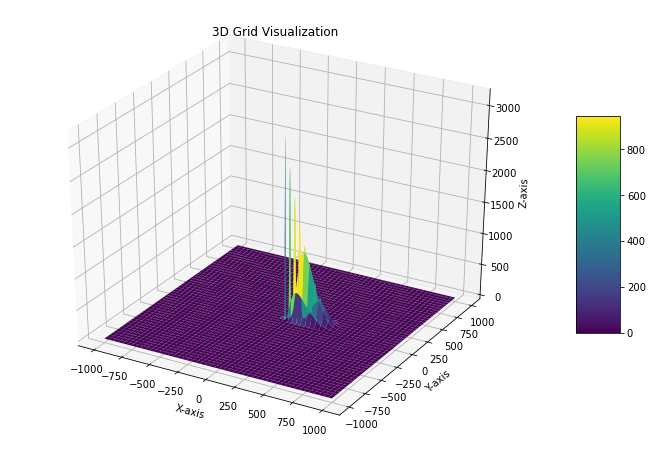

In [7]:
from matplotlib import pyplot as plt

v = 10
xv = 0
yv = 0

# ---- 3d gaussian ---- #
tla = 50
par1 = 2 * 0.0064  # Steepness of the parabola

# Linear expansion of DRF parameters (std of gaussian)
# y=(kexp*delta + mcexp)*arc_len + cexp
kexp1 = 1 * 0.5  # [-] % inside circle
kexp2 = 5 * 0.5  # [-] % outside circle
mcexp = 1e6 * 0.0000001  # [-]
cexp = 1

Sr = 10  # sampling rate
res = 1  # resolution
L = 2  # length of vehicle

for ii in range(1, 180, 30):
    X, Y, Z_cur = get_x_y_z(v, xv, yv, tla, par1, kexp1, kexp2, mcexp, cexp, Sr, res, L, ii)

    print(X.shape, Y.shape, Z_cur.shape)
    # Display the grid using colors based on the Z values
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z_cur, cmap='viridis')

    # Add labels and a colorbar
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_title('3D Grid Visualization')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()
    break


In [12]:
import plotly.graph_objects as go
# Assuming the Gaussian class and its methods are defined above
# Parameters
v = 10
xv = 0
yv = 0
Sr = 10
res = 1
L = 2


tla = 5
par1 = 2 * 0.0064
kexp1 = 5 * 0.5
kexp2 = 5 * 0.5
mcexp = 1e6 * 0.0000001
cexp = 1

for ii in range(1, 180, 30):
    X, Y, Z_cur = get_x_y_z(v, xv, yv, tla, par1, kexp1, kexp2, mcexp, cexp, Sr, res, L, ii)
    print(X.shape, Y.shape, Z_cur.shape)
    fig = plt.figure(figsize=(12, 12))
    fig = go.Figure(go.Surface(x=X, y=Y, z=Z_cur, colorscale='Viridis'))

    fig.update_layout(
        scene=dict( xaxis_title='X-axis', yaxis_title='Y-axis', zaxis_title='Z-axis'),
        title='3D Grid Visualization'
    )

    fig.show()
    break


(201, 201) (201, 201) (201, 201)


<Figure size 864x864 with 0 Axes>